# Backtrader Defensive Investor Simulation - all 14,000 companies - v1
**Purpose.** The purpose of this notebook is to simulate the application of Ben Graham's *Defensive Investor's criteria (as described in Chapter 14 of Intelligent Investor)* in a portfolio strategy over the past 10 years. 

**Pre-work.** This notebook builds on output saved on disk, to speed up the process - the following steps are very time-consuming:
1. [Download Quandl data to apply Defensive Investor's criteria](http://localhost:8888/notebooks/Download%20Quandl%20data%20to%20apply%20Defensive%20Investor's%20criteria.ipynb) saves fundamentals data from all 14,121 companies in Quandl Sharadar/SF1 database needed to apply defensive investor's test in a CSV file, to be used in step 2.
2. [Evolution of companies meeting Defensive Investor criteria over time](http://localhost:8888/notebooks/Evolution%20of%20companies%20meeting%20Defensive%20Investor%20criteria%20over%20time.ipynb) saves all companies passing the first 5 criteria in a pickle file (the last 2 criteria will be tested in this notebook), to be used in step 3 and in this notebook.
3. [Download Daily Prices, PE & PB data from all companies passing Defensive Investor Criteria](http://localhost:8888/notebooks/Download%20Daily%20Prices%2C%20PE%20%26%20PB%20data%20from%20all%20companies%20passing%20Defensive%20Investor%20Criteria.ipynb) saves daily prices, PE and PB ratios from the list in previous step in a CSV file, to be used in this notebook.

## Step 1: Load all pre-processed data needed to run the simulation

In [2]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import os
import quandl
from datetime import datetime
import backtrader as bt
import backtrader.feeds as btfeeds
import backtrader.analyzers as btanalyzers
import matplotlib.pyplot as plt
import pickle
from graham import *

quandl.ApiConfig.api_key = os.getenv('QUANDL_APY_KEY')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
fname_companies = os.path.join(os.getcwd(), 'data_defensive', 'defensive1_companies_20081231_20181231.pkl')
fname_pricedata = os.path.join(os.getcwd(), 'data_defensive', 'defensive1_pricedata_20081231_20181231.csv')

In [10]:
def load_obj(filename):
    with open(filename, 'rb') as f:
        return pickle.load(f)
    
dc_companies = load_obj(fname_companies)
df_pricedata = pd.read_csv(fname_pricedata, index_col=0, parse_dates=['date'])

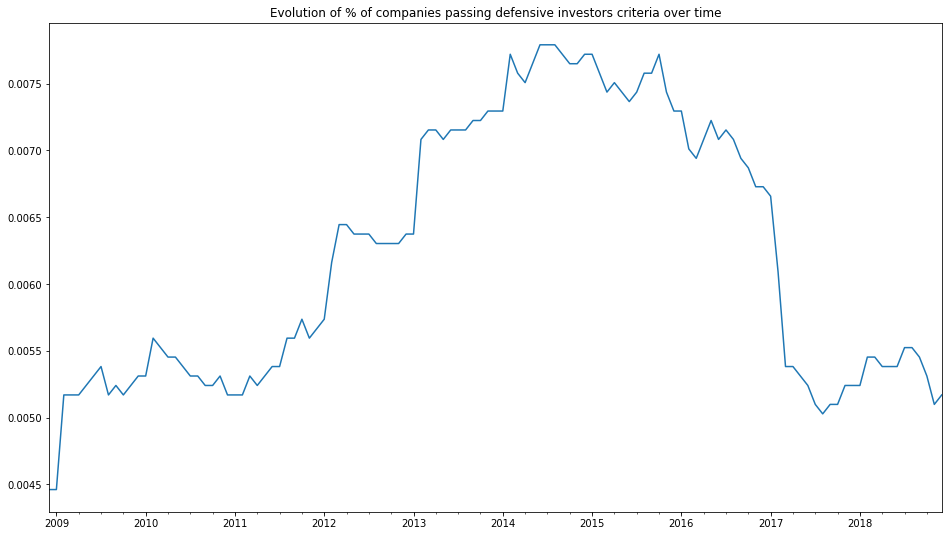

In [47]:
df = pd.DataFrame(columns=['companies_passing'], index=dc_companies.keys())
for key, value in dc_companies.items():
    df.at[key, 'companies_passing'] = len(value)

df['perc_companies_passing'] = df['companies_passing'] / 14121    
df['perc_companies_passing'].plot(figsize=(16, 9), 
                                  title='Evolution of % of companies passing defensive investors criteria over time')

In [16]:
def get_trading_data(ticker):
    df = df_pricedata[df_pricedata['ticker'] == ticker][['date', 'open', 'high', 'low', 'close', 'volume', 'pe', 'pb']]
    df.set_index('date', inplace=True)
    return df

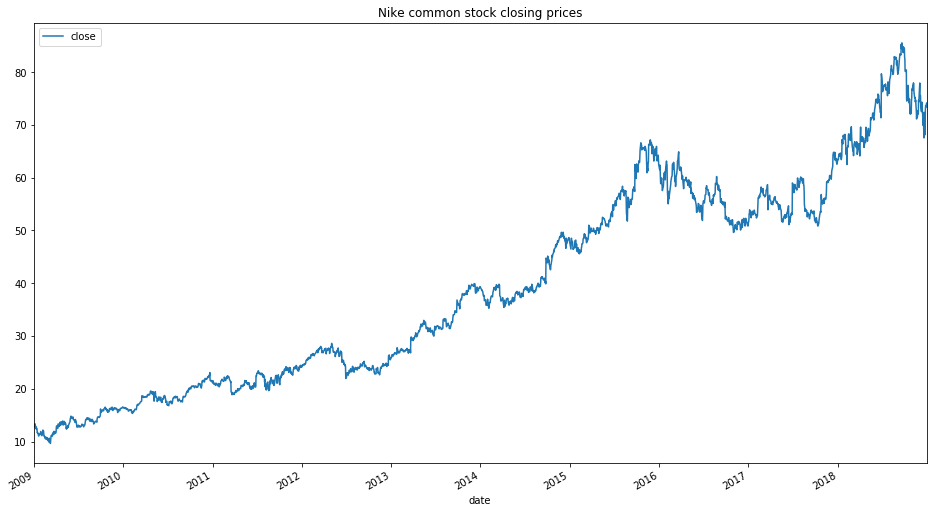

In [22]:
get_trading_data('NKE')[['close']].plot(figsize=(16, 9), title='Nike common stock closing prices')

## Step 2: Define the trading strategy

## Step 3: Run the strategy

## Step 4: Evaluate the results

## Next steps